**1. Data acquisition exercise**

> pd.read_excel("file_name.xlsx", sheet_name = number_count_from_zero_locate_sheet)
>
> read from google sheet
> ```python
sheet_url = 'url_to_google_sheet'    
>
>csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
>
>df_googlesheet = pd.read_csv(csv_export_url)
> ```
>
> pd.read_clipboard() # will import the copied info into tabular form

**2. Data exploration & visualization with seaborn and matplotlib**

melted = pd.melt(df, id_vars = df.col_for_index, value_vars = value_to_be_filled
```python
melted = pd.melt(train, id_vars = ["species"], value_vars = train.select_dtypes(include = 'float'))
```

**3. Use scipy stats package - determine feauture relevance using hypythoesis testing and statistic significance**
```python
sp.stats.ttest_ind(
    train[train.species == "virginica"].sepal_length,
    train[train.species == 'versicolor'].sepal_length)
```

Use a python module containing datasets as a source from the iris data. 
Create a pandas dataframe, df_iris, from this data.

In [1]:
from pydataset import data
import pandas as pd
df_iris = pd.DataFrame(data('iris'))

In [2]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [4]:
# print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
# print the summary statistics for each of the numeric variables. 
# Would you recommend rescaling the data based on these statistics?
df_iris.describe()
# might be good idea to scale, especially looking at the difference between Sepal.Length & Petal.Width

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [7]:
df_excel = pd.read_excel("Excel_Exercises.xlsx", sheet_name = 0)

In [8]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [9]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.iloc[ :100]
# good find data.loc[data['id'] > 2000, "first_name"] = "John"

In [10]:
df_excel_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
customer_id          100 non-null object
gender               100 non-null object
is_senior_citizen    100 non-null int64
partner              100 non-null object
dependents           100 non-null object
phone_service        100 non-null int64
internet_service     100 non-null int64
contract_type        100 non-null int64
payment_type         100 non-null object
monthly_charges      100 non-null float64
total_charges        100 non-null float64
churn                100 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 9.5+ KB


In [11]:
# print the number of rows of your original dataframe
# other options: df_excel.shape & 
len(df_excel.index)

7049

In [12]:
# print the first 5 column names
df_excel.columns.values[ :5]

array(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'dependents'], dtype=object)

In [13]:
# print the column names that have a data type of object
# can exclude only certain types with > exclude = 'something'
df_excel.select_dtypes(include = 'object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
customer_id          7049 non-null object
gender               7049 non-null object
is_senior_citizen    7049 non-null int64
partner              7049 non-null object
dependents           7049 non-null object
phone_service        7049 non-null int64
internet_service     7049 non-null int64
contract_type        7049 non-null int64
payment_type         7049 non-null object
monthly_charges      7049 non-null float64
total_charges        7038 non-null float64
churn                7049 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 660.9+ KB


In [15]:
# compute the range for each of the numeric variables.
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [24]:
# Read the data from this google sheet into a dataframe, df_google
# key: need .replace('/edit#gid=', '/export?format=csv&gid=')
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# print the first 3 rows
df_google.head(3)
# print the number of rows and columns
df_google.shape
# print the column names
df_google.columns
# print the data type of each column
df_google.info()
# print the summary statistics for each of the numeric variables
df_google.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# print the unique values for each of your categorical variables
categorical = df_google.select_dtypes(include = 'object')
for col in categorical:
     print (categorical[col].unique())


['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In a new python module, acquire.py:

get_titanic_data: returns the titanic data from the codeup data science database as a pandas data frame.


In [18]:
import acquire

In [19]:
get_titanic_data = pd.DataFrame(acquire.get_data_from_mysql())

Type in your queryselect * from passengers
Name the databasetitanic_db


In [20]:
get_titanic_data.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


``` SQL
SELECT * FROM measurements LEFT JOIN species USING(species_id);
```

In [21]:
# get_iris_data: returns the data from the iris_db on the codeup data science database 
# as a pandas data frame. The returned data frame should include the actual 
# name of the species in addition to the species_ids.
#get_titanic_data = pd.DataFrame(wrangle.get_data_from_mysql())
get_iris_data = pd.DataFrame(acquire.get_data_from_mysql())


Type in your querySELECT * FROM measurements LEFT JOIN species USING(species_id);
Name the databaseiris_db


In [22]:
get_iris_data.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [51]:
# convert all the copied info into dataframe
pd.read_clipboard()

,,,,,print,the,first,5,column,names
print,the,column,names,that,have,a,data,type,of,object
compute,the,range,for,each,of,the,numeric,variables.,None,None
Read,the,data,from,this,google,sheet,into,a,"dataframe,",df_google


In [1]:
import pandas as pd
import numpy as np
import acquire
import prep_iris
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame(acquire.get_data_from_mysql())

Type in your querySELECT * FROM measurements JOIN species USING(species_id);
Name the databaseiris_db


In [20]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [3]:
df = prep_iris.process_col_name(df)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# Split data into train (70%) & test (30%) samples.
train,test = prep_iris.split_my_data(df)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 72 to 142
Data columns (total 5 columns):
sepal_length    45 non-null float64
sepal_width     45 non-null float64
petal_length    45 non-null float64
petal_width     45 non-null float64
species         45 non-null object
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Create a swarmplot using a melted dataframe of all your numeric variables. 
x-axis is the variable name, 
y-axis is the measure. 

Use color to represent species. 

In [7]:
melted = pd.melt(train, id_vars = ["species"], value_vars = train.select_dtypes(include = 'float'))

In [9]:
melted.head()

,species,variable,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


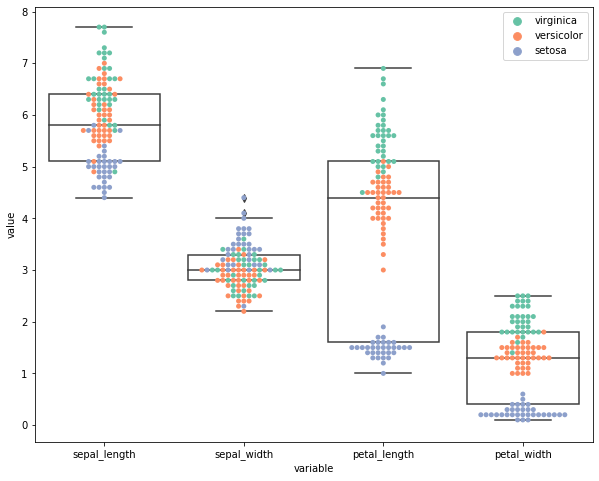

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.swarmplot(x = "variable", y = "value", data = melted, hue = "species", palette="Set2")
ax = sns.boxplot(x = "variable", y = "value", data = melted,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})
plt.legend(loc=1)

Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length
What are your takeaways?

- petal length and width correlates best, distinct two clusters
- with all the other combinations, less distiguishable clusters, but still are two clusters presented

In [19]:
import matplotlib.gridspec as gridspec

In [16]:
train["sepal_area"] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width

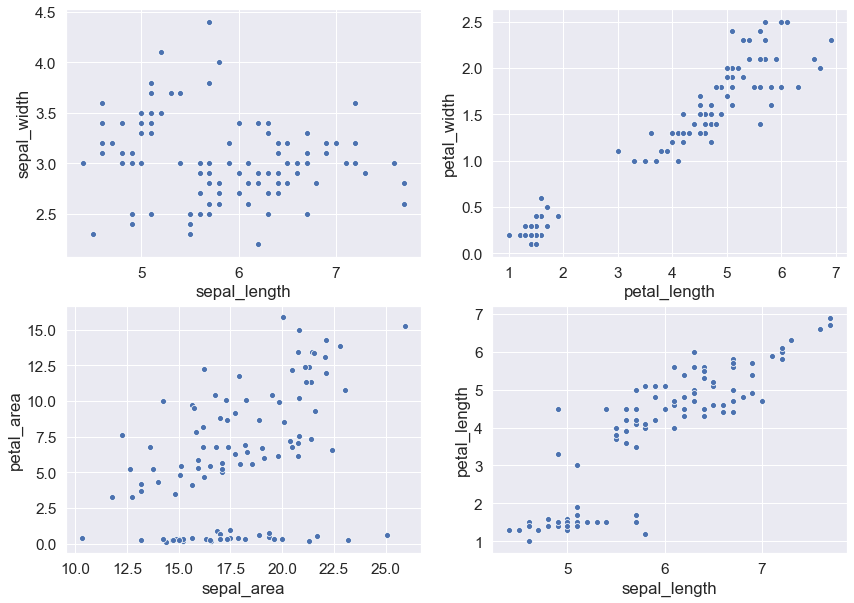

In [23]:
fig = plt.figure(figsize = (14,10))
gs = gridspec.GridSpec(2, 2)
sns.set(font_scale=1.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1,1])

sns.scatterplot(x="sepal_length", y="sepal_width", data=train, ax = ax1)
sns.scatterplot(x="petal_length", y="petal_width", data=train, ax = ax2)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, ax = ax3)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, ax = ax4)

- Create a heatmap of each variable layering correlation coefficient on top.

- Create a scatter matrix visualizing the interaction of each variable

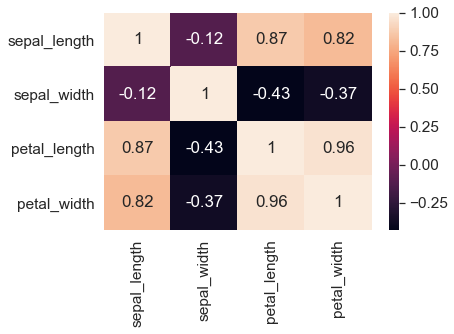

In [24]:
sns.heatmap(df.corr(), annot = True)
#process

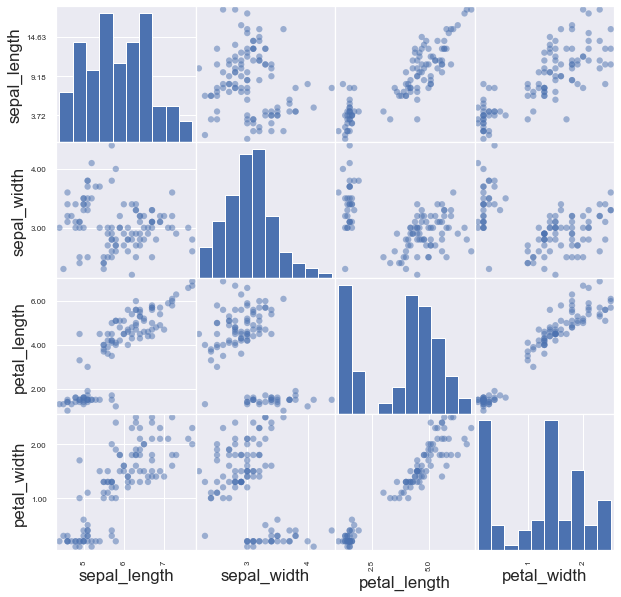

In [31]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('jet')
axes = pd.plotting.scatter_matrix(
    train[['sepal_length','sepal_width', 'petal_length', 'petal_width']], marker = 'o', s = 40,
    hist_kwds = {'bins': 10}, figsize = (10,10), cmap = cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

Is the **sepal length** significantly different in virginica compared to versicolor? 

Run an experiment to test this.
must include null hypothesis, alternative hypothesis, t-test, results, summary

> $Ho: $ the difference in sepal length between virginica and versicolor is insignificant.
>
> $Hα: $ the difference in sepal length between virginica and versicolor is substantial.

We will test if the sepal length of virginica is significantly different than that of the versicolor.
If there is difference, then variable sepal_length is a good choice to keep as a feature.
We can use a t-test here, as sepal_length is somewhat normally distributed.

In [33]:
import scipy as sp
import numpy as np

# compare the sepal_length > is continuous > t-test
sp.stats.ttest_ind(
    train[train.species == "virginica"].sepal_length,
    train[train.species == 'versicolor'].sepal_length)
# pvalue less than 0.05, reject Ho
# there is a significant difference between sepal_length of virginica and versicolor
# thus the variable sepal_length is good choice to keep as a feature to differentiate the two species

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [36]:
sp.stats.ttest_ind(
    train[train.species == "virginica"].sepal_width,
    train[train.species == 'versicolor'].sepal_width)

# pvalue is slightly higher than 0.05
# also much higher than sepal_length
# might be a worse option

Ttest_indResult(statistic=1.876015917393687, pvalue=0.06476397073974821)

In [1]:
def plot_bars(features, target, df):
    '''
    plot_bars(features, target, df):
    - iterates through dataframe columns and plots barcharts for all categorical columns
    args:
        features: list of string column names
        target: name of target variable column
        df: data frame containing feature and target columns
    '''

    # iterate through feature columns and select columns of object or integer type
    for column in df[features].select_dtypes([object, int]).columns.tolist():\
        # check how many unique values column has, if over 5, we won't use column
        if len(df[column].unique()) <= 5:
            # build chart
            sns.barplot(column, target, data=df)
            plt.title(column)
            plt.ylabel(target)
            plt.show()

def plot_violin(features, target, df):
    '''
    
    '''
    for descrete in df[features].select_dtypes([object,int]).columns.tolist():
        if df[descrete].nunique() <= 5:
            for continous in df[features].select_dtypes(float).columns.tolist():
                sns.violinplot(descrete, continous, hue=target,
                data=df, split=True, palette=['blue','orange'])
                plt.title(continous + 'x' + descrete)
                plt.ylabel(continous)
                plt.show()


In [2]:
plot_bars(X, y, train)

NameError: name 'X' is not defined